In [177]:
import math
from scipy.optimize import *
from scipy.integrate import *
import matplotlib.pyplot as plt
import numpy as np

mesh = 200;
ror = 1;
rr = 100;
roa = 100;
ra = 5000;
da = 30;
ca = np.linspace(0.01,200,mesh)
cr1 = (ror+rr*np.power(ca,2))/(1+np.power(ca,2))
cr2= np.sqrt(((roa + ra*np.power(ca,2))/(da*ca))-1-np.power(ca,2))

def plotvector(ar ,t = np.linspace (0,20,200)):
    ca, cr = ar
    ror = 1;
    rr = 100;
    roa = 100;
    ra = 5000;
    da = 30;
    E = [(-da*ca)+(roa+ra*math.pow(ca,2))/(1+ca*ca+math.pow(cr,2)),
         -cr+(ror+rr*math.pow(ca,2))/(1+math.pow(ca,2))]
    return E

fin_ca,fin_cr = fsolve(plotvector,([1,1]))

print("(ca,cr)=("+ str(fin_ca) + "," + str(fin_cr) + ")")


(ca,cr)=(0.2640870637696447,7.454318793339845)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


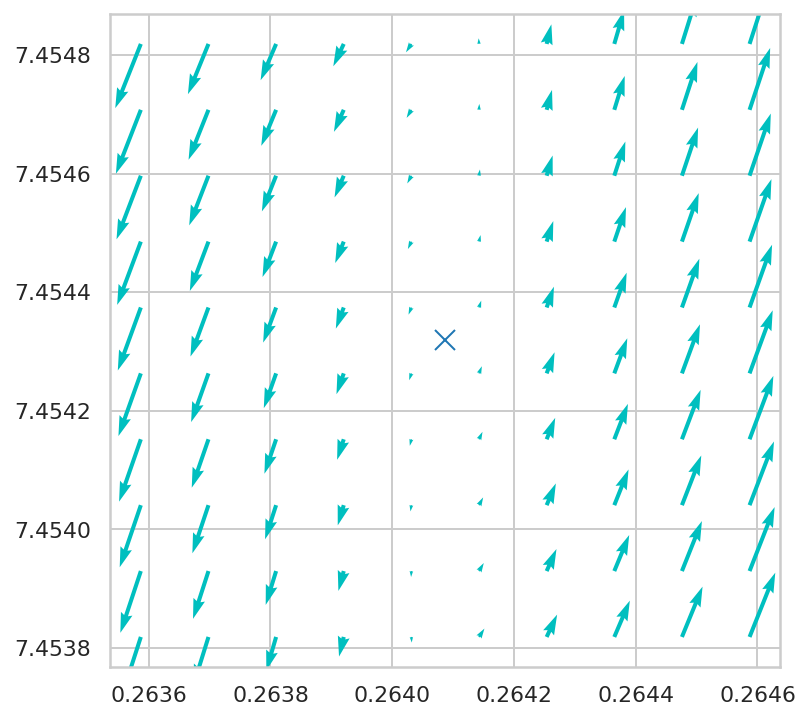

In [174]:
d = 0.0005
t = np.linspace(0,20,200)
v_ca = np.linspace(fin_ca-d, fin_ca+d, 10)
v_cr = np.linspace(fin_cr-d, fin_cr+d, 10)

m_ca,m_cr = np.meshgrid(v_ca, v_cr)
t_ca, t_cr= np.zeros(m_ca.shape), np.zeros(m_cr.shape)

for i in range(10):
    for j in range(10):
        CA = m_ca[i,j]
        CR = m_cr[i,j]
        der = plotvector([CA, CR],t)
        t_ca[i,j] = der[0]
        t_cr[i,j] = der[1]

plt.rcParams["figure.figsize"] = (6,6) 
G = plt.quiver(m_ca, m_cr, t_ca, t_cr, color = 'c');
plt.plot(fin_ca, fin_cr, 'x', markersize = 10);

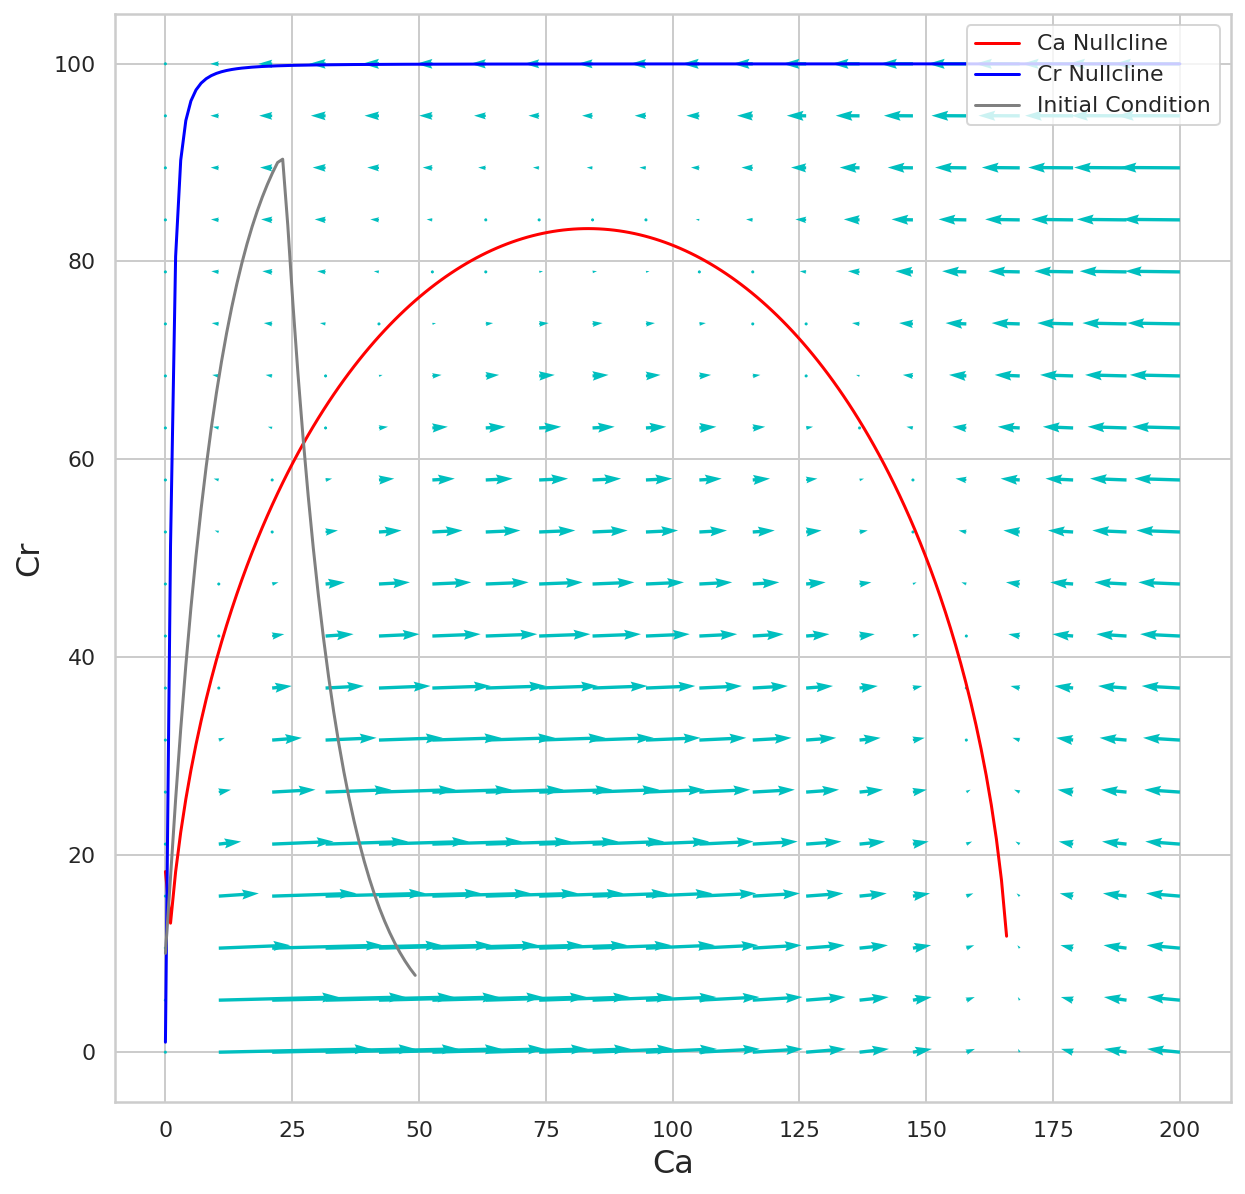

In [195]:
#Part c
n = 20
t = np.linspace(0, 20, 205)
v_ca = np.linspace(0, 200,n)
v_cr = np.linspace(0, 100,n)
m_ca, m_cr = np.meshgrid(v_ca, v_cr)
t_ca, t_cr = np.zeros(m_ca.shape), np.zeros(m_cr.shape)

for i in range(n):
    for j in range(n):
        CA = m_ca[i,j]
        CR = m_cr[i,j]
        der = plotvector([CA, CR], t)
        t_ca[i,j] = der[0]
        t_cr[i,j] = der[1]

#Part e ODE solution
ca0 = 1;
cr0 = 10;
car = [ca0, cr0]
solution = odeint(plotvector, car, t)
ca0 = solution[:,0]
LTca = ca[0:50]
cr0 = solution[:,1]
LTcr = cr[0:50]

plt.rcParams["figure.figsize"] = (10,10) 
G = plt.quiver(m_ca, m_cr, t_ca, t_cr, color='c');

plt.plot(ca, cr2,'r', label='Ca Nullcline');
plt.plot(ca, cr1,'b', label='Cr Nullcline');
plt.plot(LTca, LTcr,'gray',label= 'Initial Condition');
plt.xlabel('Ca')
plt.ylabel('Cr')
plt.legend(loc='upper right');

[1.00000000e-02 1.01497487e+00 2.01994975e+00 3.02492462e+00
 4.02989950e+00 5.03487437e+00 6.03984925e+00 7.04482412e+00
 8.04979899e+00 9.05477387e+00 1.00597487e+01 1.10647236e+01
 1.20696985e+01 1.30746734e+01 1.40796482e+01 1.50846231e+01
 1.60895980e+01 1.70945729e+01 1.80995477e+01 1.91045226e+01
 2.01094975e+01 2.11144724e+01 2.21194472e+01 2.31244221e+01
 2.41293970e+01 2.51343719e+01 2.61393467e+01 2.71443216e+01
 2.81492965e+01 2.91542714e+01 3.01592462e+01 3.11642211e+01
 3.21691960e+01 3.31741709e+01 3.41791457e+01 3.51841206e+01
 3.61890955e+01 3.71940704e+01 3.81990452e+01 3.92040201e+01
 4.02089950e+01 4.12139698e+01 4.22189447e+01 4.32239196e+01
 4.42288945e+01 4.52338693e+01 4.62388442e+01 4.72438191e+01
 4.82487940e+01 4.92537688e+01] [10.         17.70747938 25.57565731 32.69153932 39.12701096 44.94712646
 50.21072182 54.97100741 59.27610563 63.16953623 66.69065961 69.87507115
 72.75496214 75.35944475 77.71484707 79.84497545 81.771358   83.51345824
 85.08886715 86.5

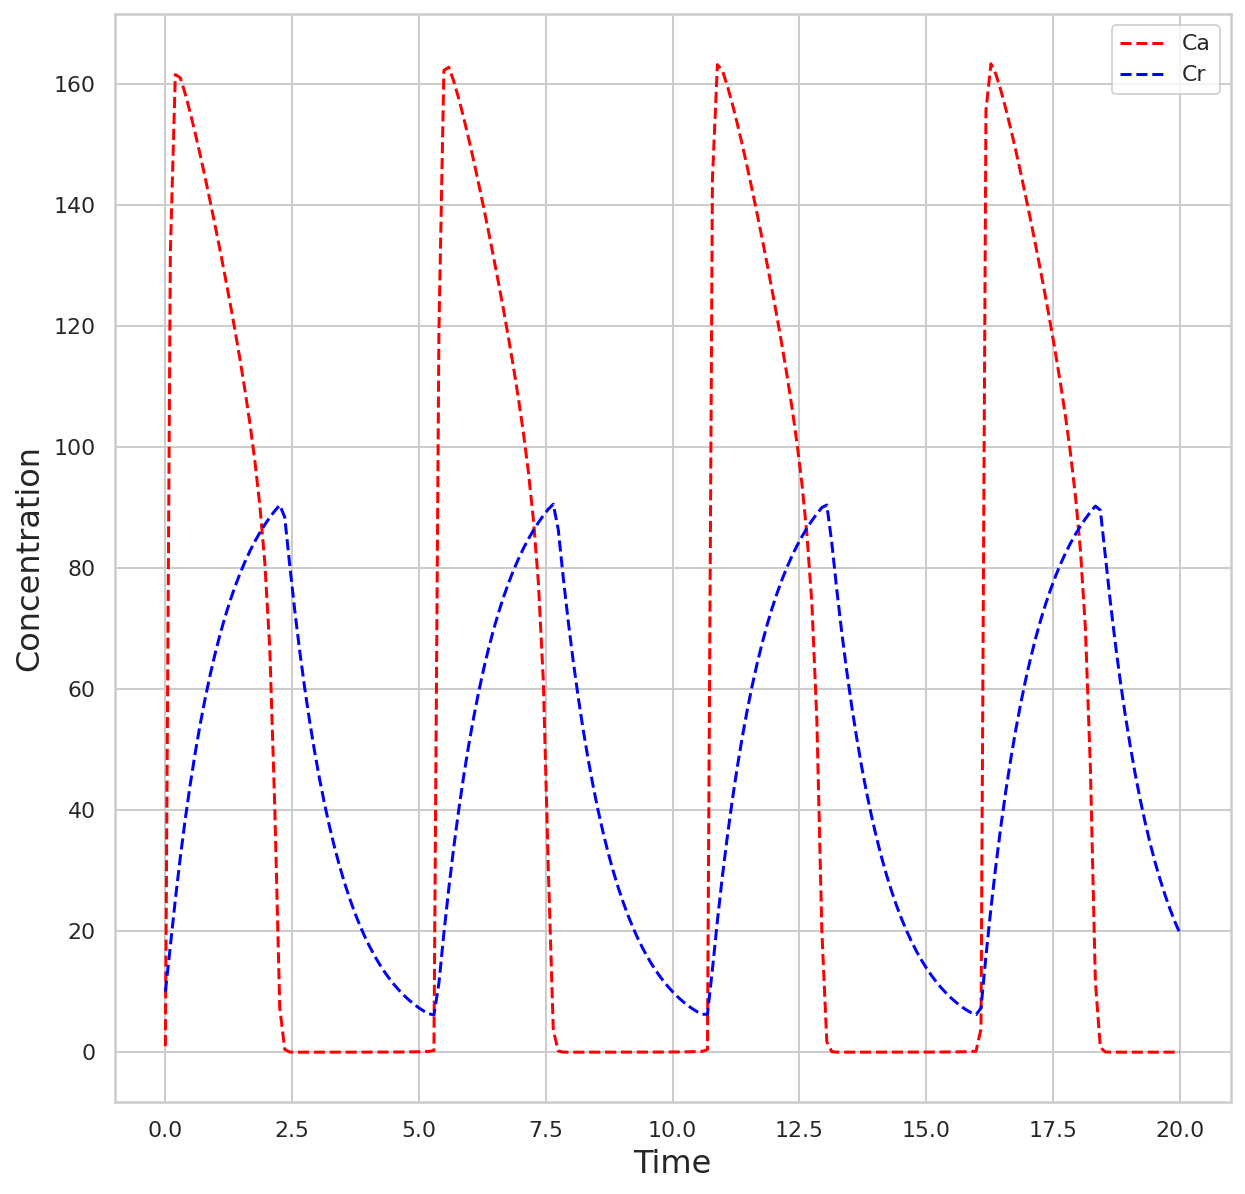

In [194]:
#Part e
print(LTca, LTcr)
plt.plot(t,ca0,'r--',label = r'Ca')
plt.plot(t,cr0,'b--',label = r'Cr')
plt.ylabel('Concentration')
plt.xlabel('Time')
plt.legend(loc=1)
plt.show()